# Estudo prático - CNN

#### Sabrina Otoni da Silva - 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import plot_model
from keras.utils import  to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


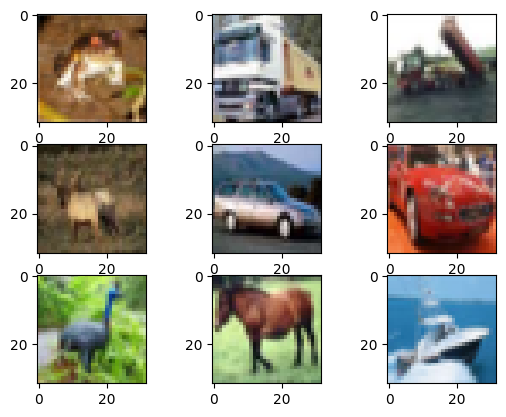

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

"One-hot encoding" aplicado aos rótulos


In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [ ]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas:

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3,3)),  activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa aula 3). Mais informações em https://keras.io/activations/

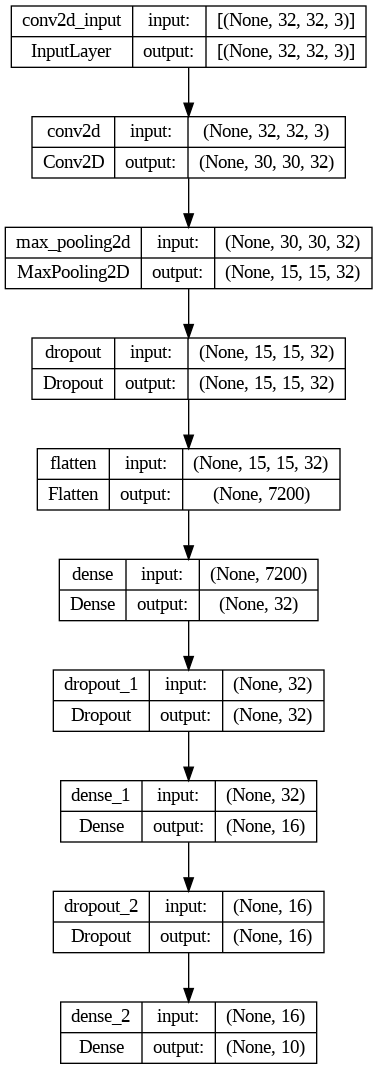

In [ ]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
439/450 [============================>.] - ETA: 0s - loss: 2.1032 - accuracy: 0.2183
Epoch 1: val_accuracy improved from -inf to 0.38980, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 14s 8ms/step - loss: 2.0977 - accuracy: 0.2208 - val_loss: 1.8322 - val_accuracy: 0.3898
Epoch 2/10
 19/450 [>.............................] - ETA: 2s - loss: 1.8632 - accuracy: 0.3163

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/450 [============================>.] - ETA: 0s - loss: 1.7704 - accuracy: 0.3382
Epoch 2: val_accuracy improved from 0.38980 to 0.44800, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 2s 5ms/step - loss: 1.7704 - accuracy: 0.3382 - val_loss: 1.6026 - val_accuracy: 0.4480
Epoch 3/10
444/450 [============================>.] - ETA: 0s - loss: 1.6392 - accuracy: 0.3920
Epoch 3: val_accuracy improved from 0.44800 to 0.48880, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 2s 5ms/step - loss: 1.6395 - accuracy: 0.3918 - val_loss: 1.4971 - val_accuracy: 0.4888
Epoch 4/10
450/450 [==============================] - ETA: 0s - loss: 1.5459 - accuracy: 0.4330
Epoch 4: val_accuracy improved from 0.48880 to 0.51120, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 2s 5ms/step - loss: 1.5459 -

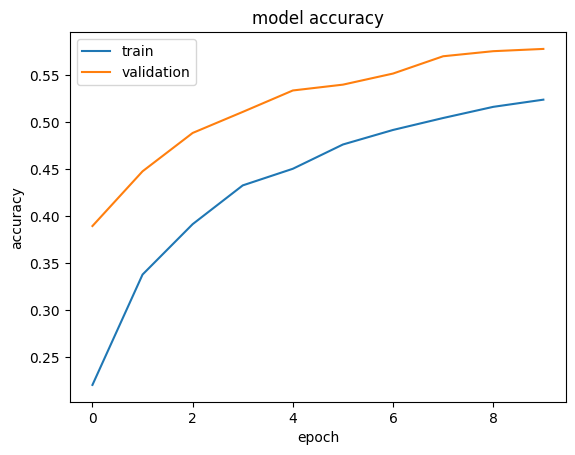

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [ ]:
model = load_model("/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5")

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5752999782562256




As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_hat

array([[2.7348713e-03, 9.8792184e-04, 9.1518827e-02, ..., 1.2892950e-02,
        7.6309787e-03, 1.9852784e-03],
       [1.6091819e-01, 9.7141974e-02, 9.5126322e-03, ..., 2.5304992e-04,
        6.7039096e-01, 5.4374631e-02],
       [2.4863502e-01, 3.9534837e-02, 2.1015847e-02, ..., 8.0169225e-04,
        6.3928497e-01, 3.6069859e-02],
       ...,
       [4.2794719e-03, 3.7907730e-04, 1.2586096e-01, ..., 3.5797954e-02,
        2.2779815e-03, 7.9172914e-04],
       [1.0784249e-01, 4.9842852e-01, 5.6198142e-02, ..., 2.2698987e-02,
        3.3519179e-02, 1.4506057e-01],
       [4.5648124e-03, 4.9551937e-04, 5.6853529e-02, ..., 5.6955093e-01,
        4.1171972e-04, 9.9570779e-03]], dtype=float32)

In [ ]:
y_hat[100,:]

array([5.5487910e-03, 1.8850680e-04, 2.1501663e-01, 1.4062478e-01,
       3.2411063e-01, 1.6531059e-01, 5.0290290e-02, 9.5953062e-02,
       1.5735867e-03, 1.3830801e-03], dtype=float32)

In [ ]:
np.argmax(y_hat[100,:])

4

In [ ]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

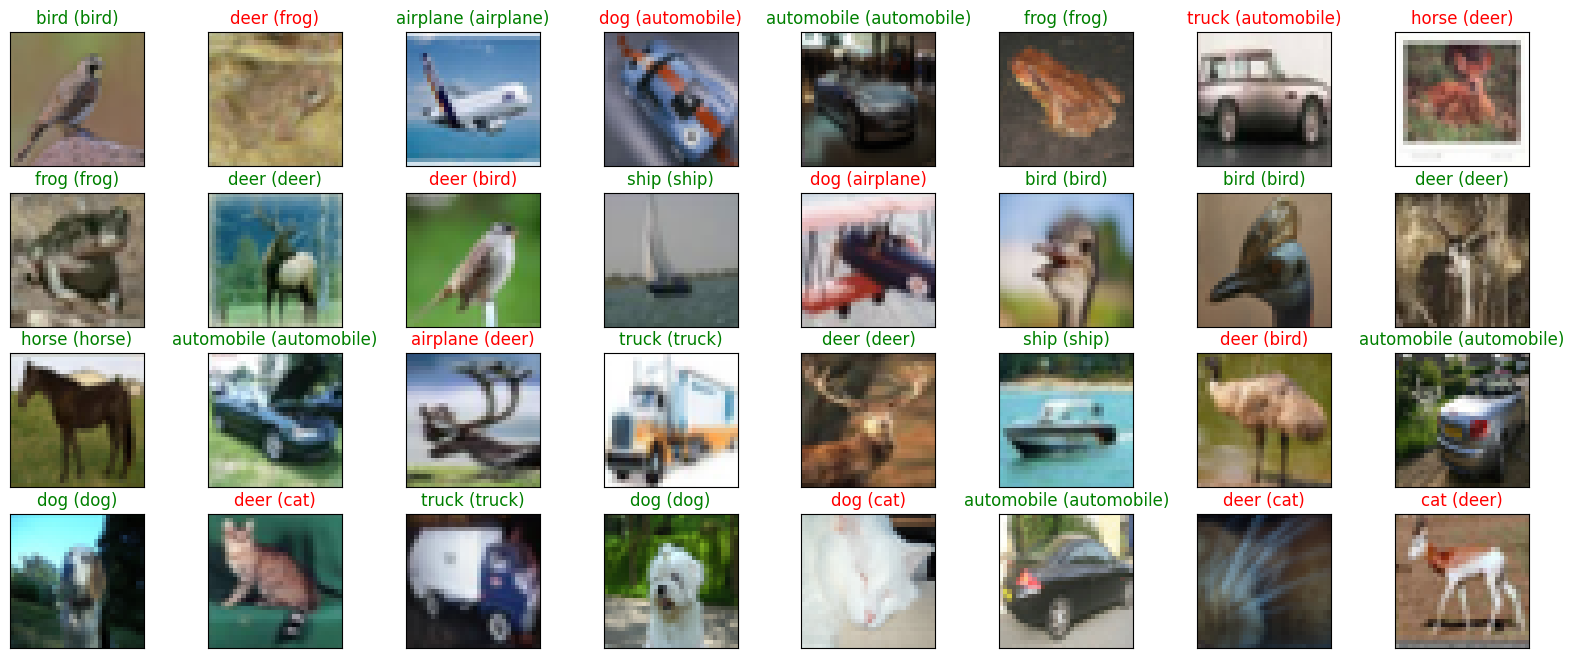

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho